<a href="https://colab.research.google.com/github/160419982021/ML/blob/main/PDE4433_2022_23_A2_T3_Maze_Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Q-learning for mobile robot navigation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
### auxiliary functions

def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def action_encode(act):
    dir_codes = {"N": 0, "E": 1, "S": 2, "W": 3}
    return dir_codes(act)

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
        print((i+1) * show_step, ' episodes ', label, sequence[-1])
    print('\n')
    plt.figure()
    plt.plot(sequence)
    plt.ylabel(label)
    plt.xlabel('episodes')

In [2]:
class grid_env():
### definition of the maze environment

    def __init__(self, width = 5, height = 5, start = [0, 0], debug = False):
        # Contructor methods create the environment with some given options
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def reset(self):
        # Reset method puts the state at the starting position
        self.pos = self.start[:]   # columns, rows
        return self.pos, 0, False

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])

    def state_encode(self, position):
        code = position[0] + position[1] * (self.width) # columns, rows
        return(code)

    def step(self, action):
        # Depending on the action, update the environment state
        if action == "S" and (self.pos[1] < self.height -1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width -1):
            self.pos[0] += 1

        done = (self.pos == self.goal)  # check if goal was reached
        if done:
            reward = self.width + self.height  # reward at goal
        else:
            reward = -1  # negative reward at every step

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal[0] == x and self.goal[1] == y:
                    if self.pos[0] == x and self.pos[1] == y:
                        res += "@"
                    else:
                        res += "o"
                    continue
                if self.pos[0] == x and self.pos[1] == y:
                    res += "x"
                else:
                    res += "_"
            res += "\n"
        return(res)

In [3]:
class agent():
### definition of the agent

    def __init__(self, n_obs, discount = 1, learning_rate = 0.1, eps = {'start': 1, 'min': 0.01, 'decay': 0.001}):
        self.action_space = np.asarray([0, 1, 2, 3])  # north, east, south, west
        n_actions = np.shape(self.action_space)[0]
        self.Q_table = np.zeros((n_obs, n_actions))

        self.epsilon = eps['start']   #initialize the exploration probability to 1
        self.epsilon_decay = eps['decay']   #exploration decreasing decay for exponential decreasing
        self.epsilon_min = eps['min']   # minimum of exploration proba

        self.gamma = discount   #discounted factor
        self.alpha = learning_rate   #learning rate

    def action_selection(self, state):
        if np.random.uniform(0,1) < self.epsilon:
            action = self.action_space[np.random.randint(0, 3)]   # choose a random action with probability epsilon
        else:
            action = np.argmax(self.Q_table[state,:])  # choose the best action for that state with prob 1-epsilon
        return(action)

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha*(reward + self.gamma*max(self.Q_table[next_state,:]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay*e))

    def test_agent(self, env):
        state, _, done = env.reset()
        steps = 0
        while not done and steps < 100:
            action = ag.action_selection(env.state_encode(state))
            next_state, reward, done = env.step(action_decode(action))
            steps += 1
        print(steps)

    def train(self, env, n_episodes = 1000, max_steps = 100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):   # iterate over episodes
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                action = ag.action_selection(env.state_encode(state))  # step 1: choose an action
                old_state = state[:]
                next_state, reward, done = env.step(action_decode(action))    # steps 2 and 3: The environment runs the chosen action and returns next state and reward
                ag.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))  # step 4: policy update
                trial_reward += reward
                t += 1
            ag.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return(all_rewards, all_steps)

Task 3

A.	Modify the maze, changing size and shape, and different start positions. How many steps does it take to reach the target? Does the performance vary as you expect?

B.	Change the agent learning parameters (e.g. learning rate, discount factor, exploration values). How does performance change in terms of learning speed and ability to reach the target? What happens if exploration is always maximum? And if it decreases very quickly?

C. Optional. Change the reward applied to different types of actions and test the learning performance. Are you able to find values for which learning is even faster? Imagine that there was a hole in the maze: how can you make the agent learn to avoid it?

# Your submission below

250  episodes  reward  -53.98
500  episodes  reward  -22.936
750  episodes  reward  -11.344
1000  episodes  reward  -5.724
1250  episodes  reward  -2.812
1500  episodes  reward  -0.832
1750  episodes  reward  0.412
2000  episodes  reward  0.724
2250  episodes  reward  1.484
2500  episodes  reward  1.636
2750  episodes  reward  1.968
3000  episodes  reward  2.272
3250  episodes  reward  2.532
3500  episodes  reward  2.556
3750  episodes  reward  2.664
4000  episodes  reward  2.756
4250  episodes  reward  2.836
4500  episodes  reward  2.872
4750  episodes  reward  2.876
5000  episodes  reward  2.884


250  episodes  steps  70.192
500  episodes  steps  43.6
750  episodes  steps  32.26
1000  episodes  steps  26.724
1250  episodes  steps  23.812
1500  episodes  steps  21.832
1750  episodes  steps  20.588
2000  episodes  steps  20.276
2250  episodes  steps  19.516
2500  episodes  steps  19.364
2750  episodes  steps  19.032
3000  episodes  steps  18.728
3250  episodes  steps  18.468
3500  epi

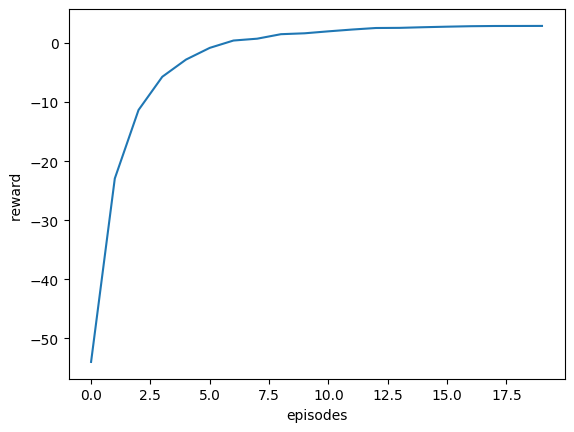

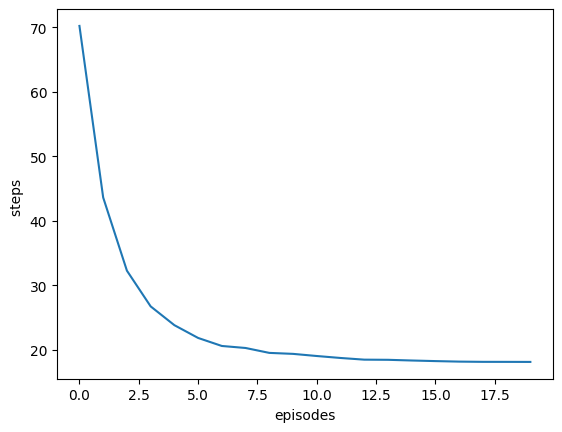

In [ ]:
# this code is only an example, remove it or change it

maze_height = 10
maze_width = 10
start = [0, 0]
maze = grid_env(maze_height, maze_width, start)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001} # parameter epsilon needs to be a dictionary
ag = agent(maze.n_states, eps = epsilon) # only one parameter is compulsory, try adding different values of discount factor and learing rate
episodes = 5000
steps = 100
[rewards, steps] = ag.train(maze, episodes, steps)

display_learning(rewards, "reward ")
display_learning(steps, "steps ")

print(ag.Q_table)

maze = grid_env(maze_height, maze_width, start, debug = True)
ag.test_agent(maze)


In [ ]:
class grid_env():
    def __init__(self, width=5, height=5, start=[0, 0], debug=False,
                 step_reward=-1, goal_reward=100, wall_reward=0, hole_reward=-100, holes=None):
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height

        # Rewards
        self.step_reward = step_reward
        self.goal_reward = goal_reward
        self.wall_reward = wall_reward
        self.hole_reward = hole_reward
        self.holes = holes if holes is not None else []

        self.reset()

    def reset(self):
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return([c, r])

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        old_pos = self.pos[:]
        if action == "S" and (self.pos[1] < self.height - 1):
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and (self.pos[0] < self.width - 1):
            self.pos[0] += 1
        else:
            return old_pos, self.wall_reward, False  # hit wall

        done = (self.pos == self.goal)

        if self.pos in self.holes:
            reward = self.hole_reward
        elif done:
            reward = self.goal_reward
        else:
            reward = self.step_reward

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if self.goal == [x, y]:
                    res += "o" if [x, y] != self.pos else "@"
                elif [x, y] in self.holes:
                    res += "#" if [x, y] != self.pos else "!"
                elif [x, y] == self.pos:
                    res += "x"
                else:
                    res += "_"
            res += "\n"
        return res


250  episodes  Reward with Hole -5.644
500  episodes  Reward with Hole 50.116
750  episodes  Reward with Hole 61.04
1000  episodes  Reward with Hole 71.512
1250  episodes  Reward with Hole 80.94
1500  episodes  Reward with Hole 82.68
1750  episodes  Reward with Hole 84.208
2000  episodes  Reward with Hole 87.516
2250  episodes  Reward with Hole 88.588
2500  episodes  Reward with Hole 88.24
2750  episodes  Reward with Hole 89.536
3000  episodes  Reward with Hole 89.488
3250  episodes  Reward with Hole 90.076
3500  episodes  Reward with Hole 90.448
3750  episodes  Reward with Hole 90.388
4000  episodes  Reward with Hole 90.62
4250  episodes  Reward with Hole 90.636
4500  episodes  Reward with Hole 90.788
4750  episodes  Reward with Hole 90.836
5000  episodes  Reward with Hole 90.868


250  episodes  Steps with Hole 31.732
500  episodes  Steps with Hole 20.26
750  episodes  Steps with Hole 16.252
1000  episodes  Steps with Hole 14.204
1250  episodes  Steps with Hole 12.928
1500  episodes 

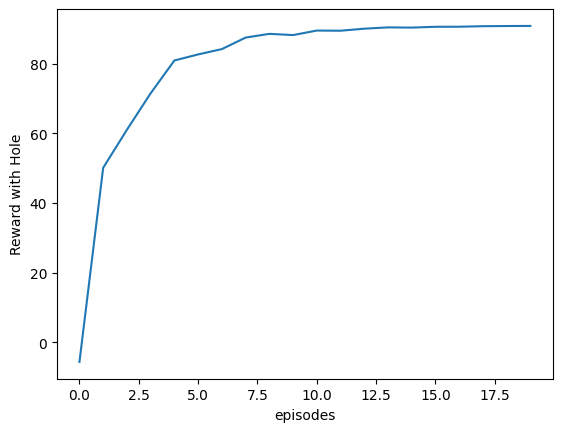

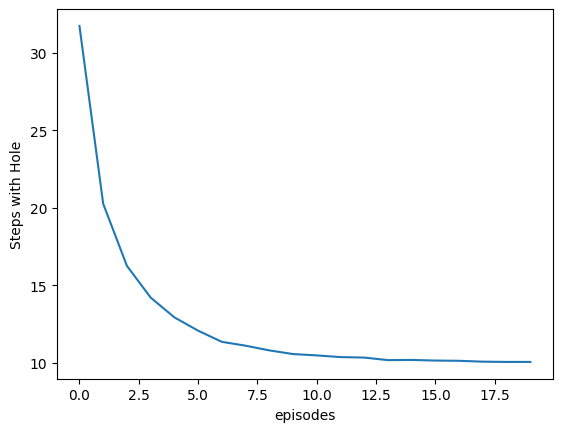

In [ ]:
maze_height = 6
maze_width = 6
start = [0, 0]

# Hole placed at [2, 2]
hole_pos = [[2, 2]]

# Custom rewards
maze = grid_env(maze_width, maze_height, start,
                step_reward=-1, goal_reward=100, wall_reward=-5, hole_reward=-100,
                holes=hole_pos)

epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001}
ag = agent(maze.n_states, discount=0.9, learning_rate=0.1, eps=epsilon)

episodes = 5000
steps = 100
rewards, step_counts = ag.train(maze, episodes, steps)

display_learning(rewards, "Reward with Hole")
display_learning(step_counts, "Steps with Hole")

# Test agent to visualize if it avoids the hole
maze = grid_env(maze_width, maze_height, start,
                step_reward=-1, goal_reward=100, wall_reward=-5, hole_reward=-100,
                holes=hole_pos, debug=True)
ag.test_agent(maze)


In [4]:
maze_configs = [
    (4, 4, [1, 1]),
    (5, 5, [2, 2]),
    (6, 6, [3, 3]),
    (7, 7, [3, 3]),
    (8, 8, [4, 4]),
    (10, 10, [5, 5])
]

results = []

for width, height, hole in maze_configs:
    print(f"--- Maze Size: {width} x {height} | Hole at: {hole} ---")
    start = [0, 0]

    maze = grid_env(width, height, start,
                    step_reward=-1,
                    goal_reward=100,
                    wall_reward=-5,
                    hole_reward=-100,
                    holes=[hole])

    epsilon = {'start': 1, 'min': 0.01, 'decay': 0.001}
    ag = agent(maze.n_states, discount=0.9, learning_rate=0.1, eps=epsilon)

    episodes = 3000
    steps = 100
    rewards, step_counts = ag.train(maze, episodes, steps)

    avg_reward = np.mean(rewards[-100:])
    avg_steps = np.mean(step_counts[-100:])

    print(f"Average reward (last 100 episodes): {avg_reward:.2f}")
    print(f"Average steps (last 100 episodes): {avg_steps:.2f}\n")

    results.append({
        'size': f"{width}x{height}",
        'hole': hole,
        'avg_reward': avg_reward,
        'avg_steps': avg_steps
    })


--- Maze Size: 4 x 4 | Hole at: [1, 1] ---


TypeError: grid_env.__init__() got an unexpected keyword argument 'step_reward'

In [6]:
class grid_env():
    ### definition of the maze environment with hole support

    def __init__(self, width=5, height=5, start=[0, 0], debug=False,
                 step_reward=-1, goal_reward=100, hole_reward=-100, holes=None):
        # Constructor to initialize the environment
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height

        # Reward values
        self.step_reward = step_reward
        self.goal_reward = goal_reward
        self.hole_reward = hole_reward
        self.holes = holes if holes is not None else []

        self.reset()

    def reset(self):
        # Reset the agent to the start position
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return [c, r]

    def state_encode(self, position):
        code = position[0] + position[1] * self.width
        return code

    def step(self, action):
        # Record current position
        old_pos = self.pos[:]

        # Update position based on action
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        # Determine reward
        done = (self.pos == self.goal)
        if self.pos in self.holes:
            reward = self.hole_reward
        elif done:
            reward = self.goal_reward
        else:
            reward = self.step_reward

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        # Display the grid
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                cell = [x, y]
                if self.pos == cell and self.goal == cell:
                    res += "@"
                elif self.pos == cell:
                    res += "x"
                elif self.goal == cell:
                    res += "o"
                elif cell in self.holes:
                    res += "#"
                else:
                    res += "_"
            res += "\n"
        return res



=== Training on 4x4 Grid ===
50  episodes  Reward (4x4) -13.48
100  episodes  Reward (4x4) -13.02
150  episodes  Reward (4x4) -11.94
200  episodes  Reward (4x4) -13.44
250  episodes  Reward (4x4) -11.96
300  episodes  Reward (4x4) -11.48
350  episodes  Reward (4x4) -9.2
400  episodes  Reward (4x4) -11.74
450  episodes  Reward (4x4) -10.92
500  episodes  Reward (4x4) -9.0
550  episodes  Reward (4x4) -6.94
600  episodes  Reward (4x4) -7.34
650  episodes  Reward (4x4) -6.68
700  episodes  Reward (4x4) -4.96
750  episodes  Reward (4x4) -4.26
800  episodes  Reward (4x4) -3.8
850  episodes  Reward (4x4) -4.12
900  episodes  Reward (4x4) -3.54
950  episodes  Reward (4x4) -3.74
1000  episodes  Reward (4x4) -3.1


50  episodes  Steps (4x4) 5.56
100  episodes  Steps (4x4) 5.82
150  episodes  Steps (4x4) 6.54
200  episodes  Steps (4x4) 6.24
250  episodes  Steps (4x4) 8.36
300  episodes  Steps (4x4) 6.44
350  episodes  Steps (4x4) 6.32
400  episodes  Steps (4x4) 8.5
450  episodes  Steps (4x4) 6.6

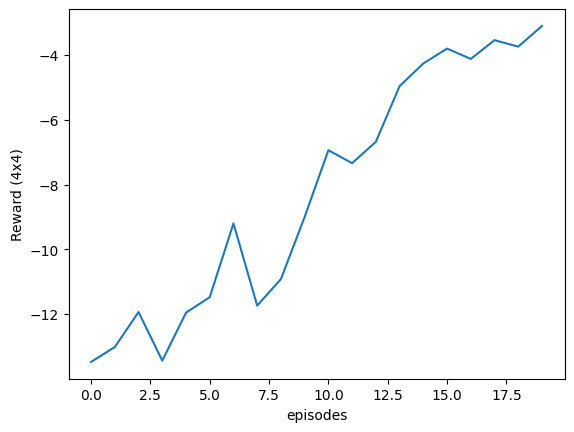

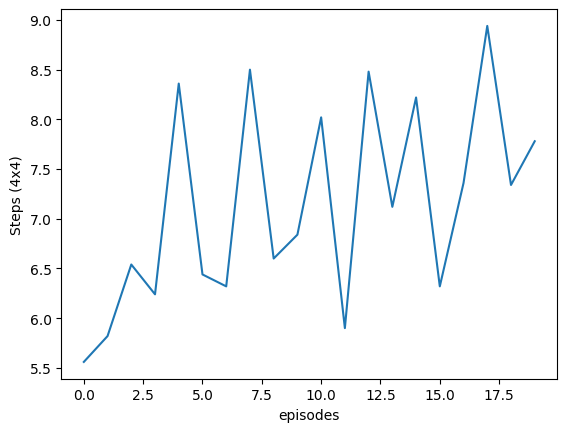

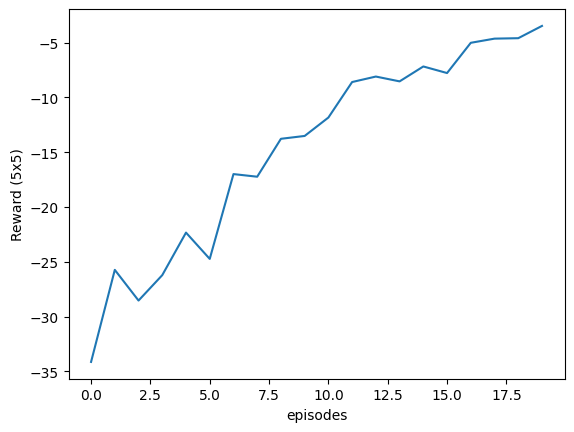

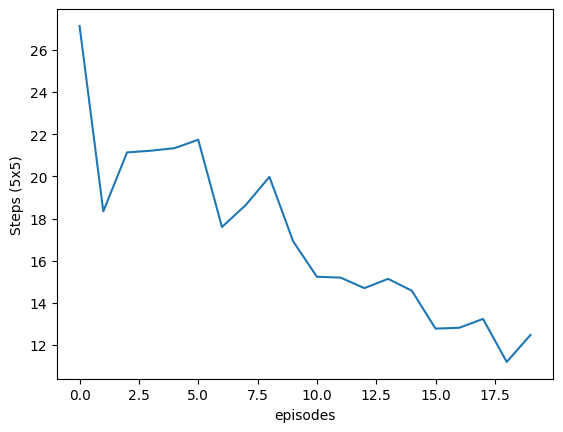

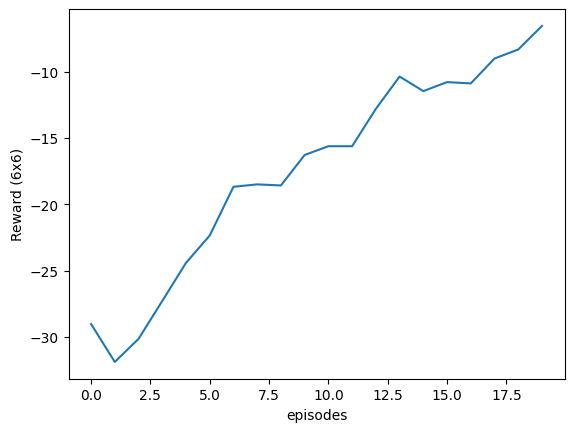

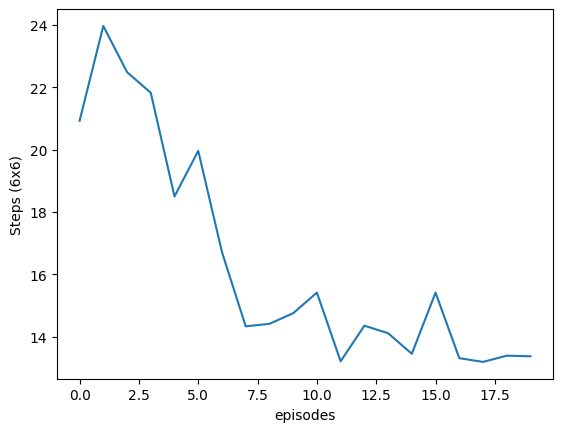

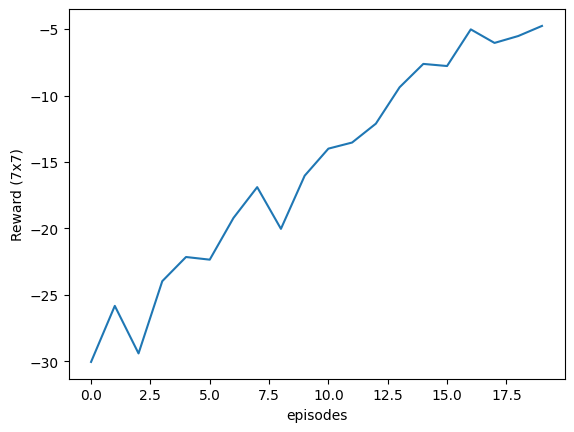

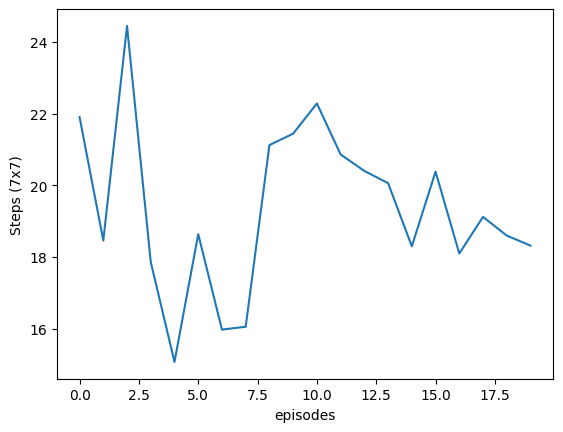

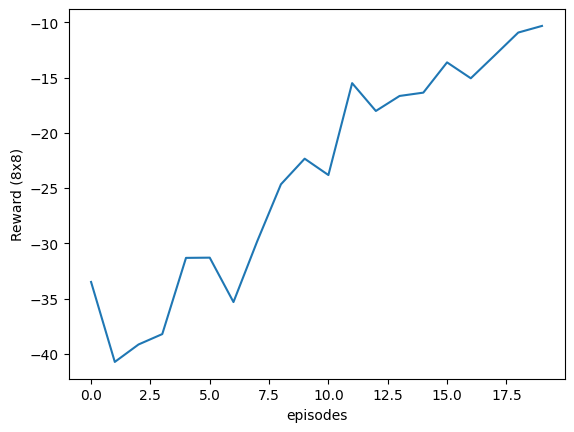

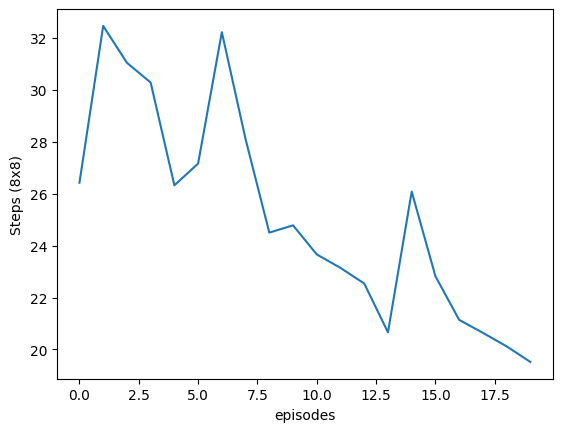

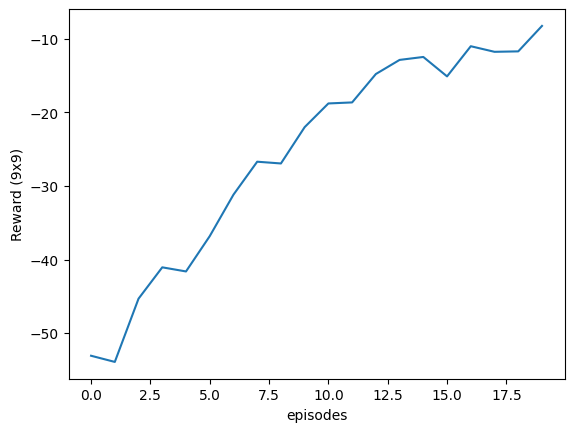

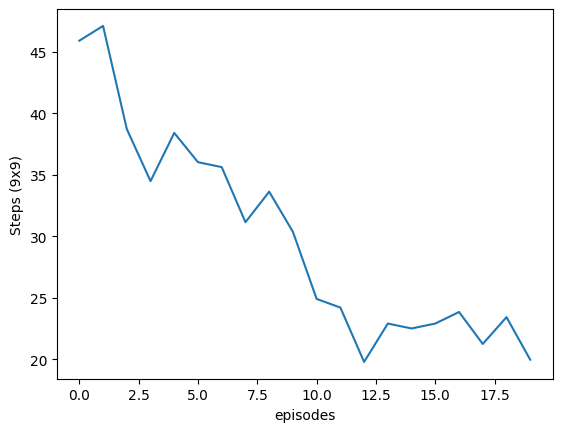

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def action_encode(act):
    dir_codes = {"N": 0, "E": 1, "S": 2, "W": 3}
    return dir_codes(act)

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
        print((i+1) * show_step, ' episodes ', label, sequence[-1])
    print('\n')
    plt.figure()
    plt.plot(sequence)
    plt.ylabel(label)
    plt.xlabel('episodes')


### Maze environment with holes
class grid_env():
    def __init__(self, width=5, height=5, start=[0, 0], holes=[], debug=False):
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.holes = holes
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def reset(self):
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_decode(self, obs_code):
        r = obs_code // self.width
        c = obs_code % self.width
        return [c, r]

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        if self.pos in self.holes:
            return self.pos, -10, True  # Penalty and end if falling in a hole

        done = (self.pos == self.goal)
        if done:
            reward = self.width + self.height
        else:
            reward = -1

        if self.debug:
            print(self.render())

        return self.pos, reward, done

    def render(self):
        res = ""
        for y in range(self.height):
            for x in range(self.width):
                if [x, y] == self.goal:
                    res += "@" if [x, y] == self.pos else "o"
                elif [x, y] in self.holes:
                    res += "#"
                elif [x, y] == self.pos:
                    res += "x"
                else:
                    res += "_"
            res += "\n"
        return res


### Q-learning agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start': 1, 'min': 0.01, 'decay': 0.001}):
        self.action_space = np.asarray([0, 1, 2, 3])
        n_actions = len(self.action_space)
        self.Q_table = np.zeros((n_obs, n_actions))

        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']

        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            action = np.argmax(self.Q_table[state, :])
        return action

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * max(self.Q_table[next_state, :]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def test_agent(self, env):
        state, _, done = env.reset()
        steps = 0
        while not done and steps < 100:
            action = self.action_selection(env.state_encode(state))
            next_state, reward, done = env.step(action_decode(action))
            steps += 1
        print("Steps taken in test run:", steps)

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                action = self.action_selection(env.state_encode(state))
                old_state = state[:]
                next_state, reward, done = env.step(action_decode(action))
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps


### Test multiple grid sizes with random holes
grid_sizes = [4, 5, 6, 7, 8, 9]

for size in grid_sizes:
    print(f"\n=== Training on {size}x{size} Grid ===")
    all_cells = [[x, y] for x in range(size) for y in range(size)]
    all_cells.remove([0, 0])
    all_cells.remove([size - 1, size - 1])
    np.random.seed(size)
    holes = list(np.random.choice(len(all_cells), size=min(3, size), replace=False))
    hole_coords = [all_cells[i] for i in holes]

    maze = grid_env(width=size, height=size, start=[0, 0], holes=hole_coords)
    ag = agent(maze.n_states)

    rewards, steps = ag.train(maze, n_episodes=1000)
    display_learning(rewards, f"Reward ({size}x{size})")
    display_learning(steps, f"Steps ({size}x{size})")

    print("Final agent test (path):")
    test_env = grid_env(width=size, height=size, start=[0, 0], holes=hole_coords, debug=True)
    ag.test_agent(test_env)


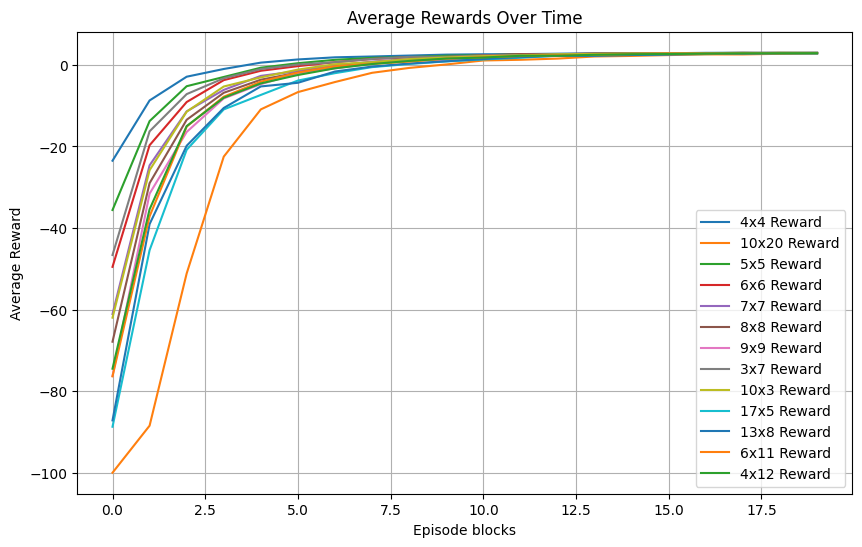

Performance Summary:
   Grid Size  Avg Reward  Avg Steps
0        4x4        2.95       6.05
1      10x20        2.79      28.21
2        5x5        2.87       8.13
3        6x6        2.90      10.10
4        7x7        2.80      12.20
5        8x8        2.81      14.19
6        9x9        2.78      16.22
7        3x7        2.91       8.09
8       10x3        2.95      11.05
9       17x5        2.72      20.28
10      13x8        2.89      19.11
11      6x11        2.92      15.08
12      4x12        2.83      14.17


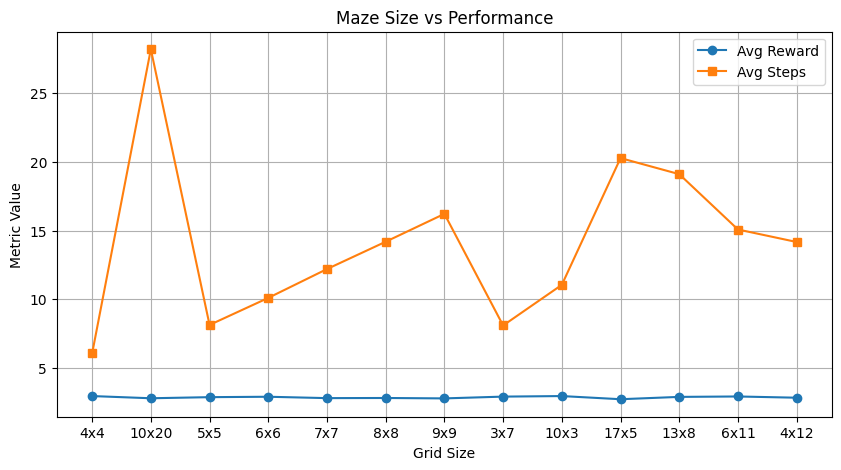

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
    plt.plot(sequence, label=label)

### Maze Environment
class grid_env():
    def __init__(self, width=5, height=5, start=[0, 0], debug=False):
        self.width = width
        self.height = height
        self.start = start
        self.goal = [self.width - 1, self.height - 1]
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def reset(self):
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = (self.pos == self.goal)
        reward = self.width + self.height if done else -1
        return self.pos, reward, done

### Q-Learning Agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# Run multiple maze sizes
grid_sizes = [(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)]
#[(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
# [
#     (4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)
# ]

results = []

plt.figure(figsize=(10, 6))
for w, h in grid_sizes:
    env = grid_env(width=w, height=h, start=[0, 0])
    ag = agent(env.n_states)
    rewards, steps = ag.train(env, n_episodes=5000, max_steps=100)
    avg_reward = np.mean(rewards[-100:])
    avg_steps = np.mean(steps[-100:])
    results.append({'Grid Size': f"{w}x{h}", 'Avg Reward': round(avg_reward, 2), 'Avg Steps': round(avg_steps, 2)})

    display_learning(rewards, label=f"{w}x{h} Reward")

plt.title("Average Rewards Over Time")
plt.xlabel("Episode blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Create and show results table
df_results = pd.DataFrame(results)
print("Performance Summary:")
print(df_results)

# Plot summary graph
plt.figure(figsize=(10, 5))
plt.plot(df_results['Grid Size'], df_results['Avg Reward'], marker='o', label='Avg Reward')
plt.plot(df_results['Grid Size'], df_results['Avg Steps'], marker='s', label='Avg Steps')
plt.title("Maze Size vs Performance")
plt.xlabel("Grid Size")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import random

class GridEnvironment:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.reset()

    def random_position(self, exclude=None):
        while True:
            pos = (random.randint(0, self.rows - 1), random.randint(0, self.cols - 1))
            if pos != exclude:
                return pos

    def reset(self):
        self.start_position = self.random_position()
        self.goal_position = self.random_position(exclude=self.start_position)
        self.agent_position = self.start_position
        self.steps = 0
        return self.agent_position

    def step(self, action):
        row, col = self.agent_position
        if action == "up":
            row = max(row - 1, 0)
        elif action == "down":
            row = min(row + 1, self.rows - 1)
        elif action == "left":
            col = max(col - 1, 0)
        elif action == "right":
            col = min(col + 1, self.cols - 1)

        self.agent_position = (row, col)
        self.steps += 1

        done = self.agent_position == self.goal_position
        reward = 1 if done else -0.1

        return self.agent_position, reward, done

    def render(self):
        grid = [["." for _ in range(self.cols)] for _ in range(self.rows)]
        sr, sc = self.start_position
        gr, gc = self.goal_position
        ar, ac = self.agent_position

        grid[sr][sc] = "S"
        grid[gr][gc] = "G"
        grid[ar][ac] = "A"

        for row in grid:
            print(" ".join(row))
        print()

# Grid sizes list
grid_sizes = [
    (4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9),
    (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)
]

# Run through each grid size
for size in grid_sizes:
    print(f"\nGrid Size: {size[0]}x{size[1]}")
    env = GridEnvironment(*size)
    env.render()

    done = False
    total_reward = 0

    actions = ["up", "down", "left", "right"]
    while not done:
        action = random.choice(actions)
        _, reward, done = env.step(action)
        total_reward += reward

    print(f"Reached goal in {env.steps} steps with total reward {total_reward:.2f}")



Grid Size: 4x4
. . . A
. G . .
. . . .
. . . .

Reached goal in 24 steps with total reward -1.30

Grid Size: 10x20
. . . . . . . . . . . . . . . . . . . .
A . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . G .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .

Reached goal in 450 steps with total reward -43.90

Grid Size: 5x5
G . . . .
. . . . .
. . . . .
. . . . .
. . . . A

Reached goal in 10 steps with total reward 0.10

Grid Size: 6x6
. . . . . .
. . . . . .
. . . . . .
. . . . . G
. . . A . .
. . . . . .

Reached goal in 9 steps with total reward 0.20

Grid Size: 7x7
. A . . . . .
. . . . G . .
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .

Reached goal in 117 steps with total reward -10.60

Grid Size: 8x8

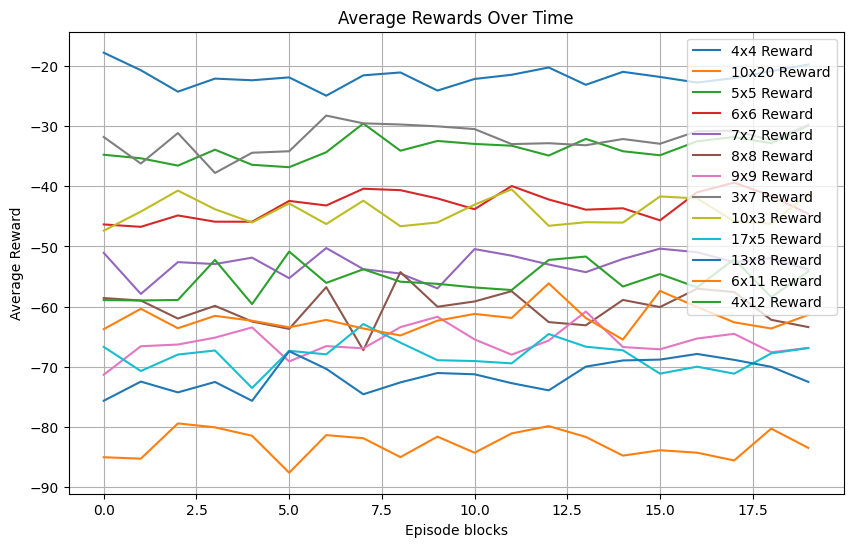

Performance Summary:
   Grid Size  Avg Reward  Avg Steps
0        4x4      -15.06      23.88
1      10x20      -78.34      85.78
2        5x5      -33.43      43.33
3        6x6      -42.27      52.41
4        7x7      -56.99      65.69
5        8x8      -64.38      72.88
6        9x9      -60.48      70.74
7        3x7      -31.97      41.87
8       10x3      -42.59      53.09
9       17x5      -66.23      75.43
10      13x8      -75.23      82.05
11      6x11      -59.92      69.46
12      4x12      -57.62      67.14


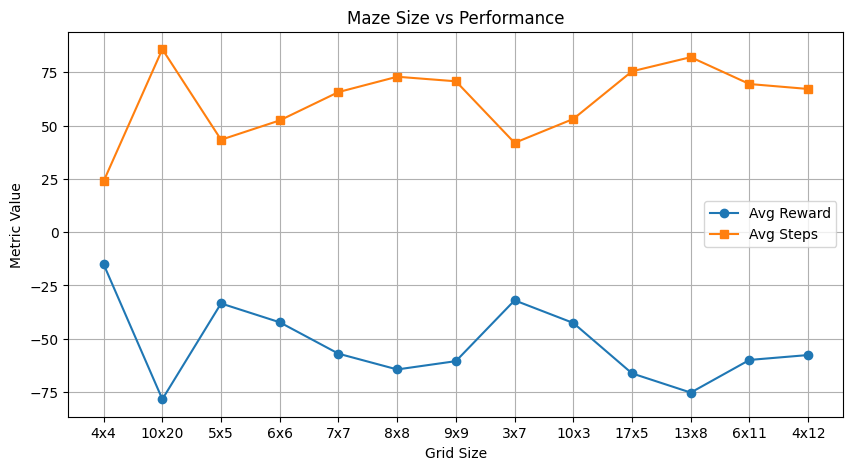

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
    plt.plot(sequence, label=label)

### Maze Environment
class grid_env():
    def __init__(self, width=5, height=5, debug=False):
        self.width = width
        self.height = height
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def random_position(self, exclude=None):
        # Randomly generate a position different from the exclude position
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if pos != exclude:
                return pos

    def reset(self):
        # Randomize start and goal positions
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = (self.pos == self.goal)
        reward = self.width + self.height if done else -1
        return self.pos, reward, done

### Q-Learning Agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# Run multiple maze sizes
grid_sizes = [(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)]

results = []

plt.figure(figsize=(10, 6))
for w, h in grid_sizes:
    env = grid_env(width=w, height=h)
    ag = agent(env.n_states)
    rewards, steps = ag.train(env, n_episodes=5000, max_steps=100)
    avg_reward = np.mean(rewards[-100:])
    avg_steps = np.mean(steps[-100:])
    results.append({'Grid Size': f"{w}x{h}", 'Avg Reward': round(avg_reward, 2), 'Avg Steps': round(avg_steps, 2)})

    display_learning(rewards, label=f"{w}x{h} Reward")

plt.title("Average Rewards Over Time")
plt.xlabel("Episode blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Create and show results table
df_results = pd.DataFrame(results)
print("Performance Summary:")
print(df_results)

# Plot summary graph
plt.figure(figsize=(10, 5))
plt.plot(df_results['Grid Size'], df_results['Avg Reward'], marker='o', label='Avg Reward')
plt.plot(df_results['Grid Size'], df_results['Avg Steps'], marker='s', label='Avg Steps')
plt.title("Maze Size vs Performance")
plt.xlabel("Grid Size")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


Streaming output truncated to the last 5000 lines.
. . . .

. S . .
. A . .
. G . .
. . . .

. S . .
. . A .
. G . .
. . . .

. S A .
. . . .
. G . .
. . . .

. S . .
. . A .
. G . .
. . . .

. S A .
. . . .
. G . .
. . . .

. A . .
. . . .
. G . .
. . . .

. S . .
. A . .
. G . .
. . . .

. S . .
A . . .
. G . .
. . . .

. S . .
A . . .
. G . .
. . . .

. S . .
. A . .
. G . .
. . . .

. A . .
. . . .
. G . .
. . . .

. S . .
. A . .
. G . .
. . . .

. S . .
. . A .
. G . .
. . . .

. S . .
. . . A
. G . .
. . . .

. S . .
. . A .
. G . .
. . . .

. S A .
. . . .
. G . .
. . . .

. S . A
. . . .
. G . .
. . . .

. S . A
. . . .
. G . .
. . . .

. S . .
. . . A
. G . .
. . . .

. S . .
. . . .
. G . A
. . . .

. S . .
. . . .
. G A .
. . . .

. S . .
. . . .
. A . .
. . . .

. . . A
G . . .
. . . .
. . . .

. . A S
G . . .
. . . .
. . . .

. . A S
G . . .
. . . .
. . . .

. . . S
G . A .
. . . .
. . . .

. . A S
G . . .
. . . .
. . . .

. A . S
G . . .
. . . .
. . . .

. . . S
G A . .


IndexError: list assignment index out of range

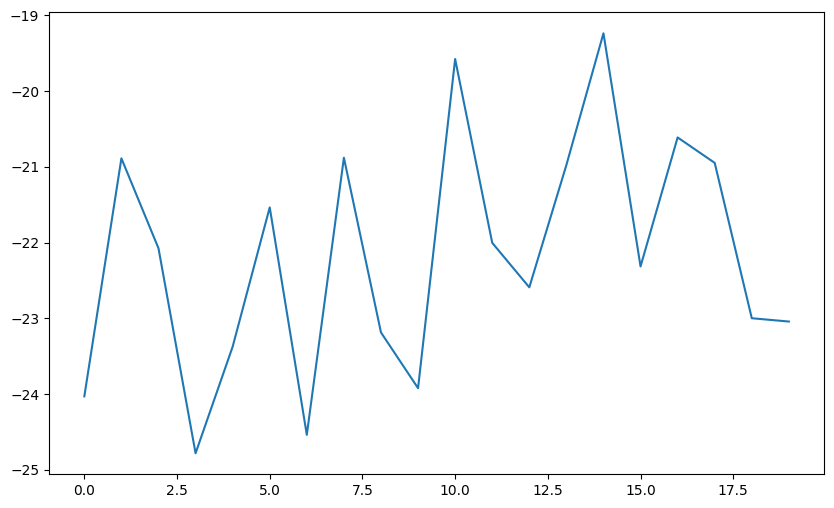

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
    plt.plot(sequence, label=label)

### Maze Environment
class grid_env():
    def __init__(self, width=5, height=5, debug=False):
        self.width = width
        self.height = height
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def random_position(self, exclude=None):
        # Randomly generate a position different from the exclude position
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if pos != exclude:
                return pos

    def reset(self):
        # Randomize start and goal positions
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = (self.pos == self.goal)
        reward = self.width + self.height if done else -1
        return self.pos, reward, done

    def render(self):
        grid = [["." for _ in range(self.width)] for _ in range(self.height)]
        sr, sc = self.start
        gr, gc = self.goal
        ar, ac = self.pos

        grid[sr][sc] = "S"  # Start position
        grid[gr][gc] = "G"  # Goal position
        grid[ar][ac] = "A"  # Agent position

        for row in grid:
            print(" ".join(row))
        print()

### Q-Learning Agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
                env.render()  # Render the grid after each step
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# Run multiple maze sizes
grid_sizes = [(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)]

results = []

plt.figure(figsize=(10, 6))
for w, h in grid_sizes:
    print(f"Grid Size: {w}x{h}")
    env = grid_env(width=w, height=h)
    ag = agent(env.n_states)
    rewards, steps = ag.train(env, n_episodes=5000, max_steps=100)

    avg_reward = np.mean(rewards[-100:])
    avg_steps = np.mean(steps[-100:])
    results.append({'Grid Size': f"{w}x{h}", 'Avg Reward': round(avg_reward, 2), 'Avg Steps': round(avg_steps, 2)})

    display_learning(rewards, label=f"{w}x{h} Reward")

    # After training, print the final grid
    print(f"Reached goal in {steps[-1]} steps with total reward {rewards[-1]:.2f}\n")

plt.title("Average Rewards Over Time")
plt.xlabel("Episode blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Create and show results table
df_results = pd.DataFrame(results)
print("Performance Summary:")
print(df_results)

# Plot summary graph
plt.figure(figsize=(10, 5))
plt.plot(df_results['Grid Size'], df_results['Avg Reward'], marker='o', label='Avg Reward')
plt.plot(df_results['Grid Size'], df_results['Avg Steps'], marker='s', label='Avg Steps')
plt.title("Maze Size vs Performance")
plt.xlabel("Grid Size")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


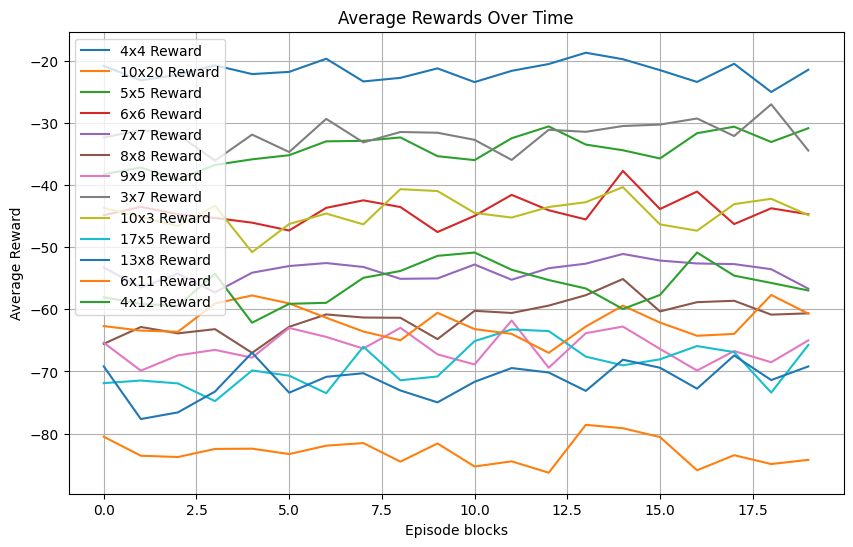

Performance Summary:
   Grid Size  Avg Reward  Avg Steps
0        4x4      -21.10      29.74
1      10x20      -86.75      91.09
2        5x5      -32.15      41.61
3        6x6      -45.39      55.53
4        7x7      -58.64      67.79
5        8x8      -63.79      72.12
6        9x9      -64.47      73.97
7        3x7      -33.35      42.81
8       10x3      -45.36      55.44
9       17x5      -66.45      76.11
10      13x8      -71.86      80.00
11      6x11      -59.49      69.03
12      4x12      -54.87      64.73


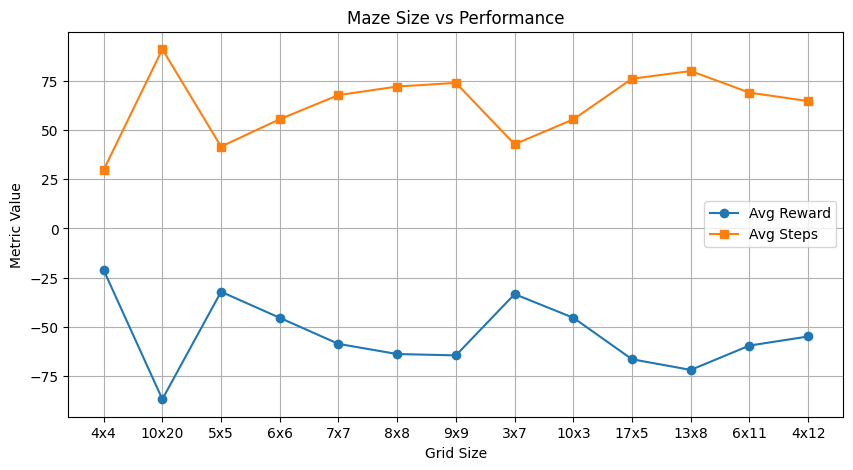

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
    plt.plot(sequence, label=label)

### Maze Environment
class grid_env():
    def __init__(self, width=5, height=5, debug=False):
        self.width = width
        self.height = height
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def random_position(self, exclude=None):
        # Randomly generate a position different from the exclude position
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if pos != exclude:
                return pos

    def reset(self):
        # Randomize start and goal positions
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = (self.pos == self.goal)
        reward = self.width + self.height if done else -1
        return self.pos, reward, done

### Q-Learning Agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# Run multiple maze sizes
grid_sizes = [(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)]

results = []

plt.figure(figsize=(10, 6))
for w, h in grid_sizes:
    env = grid_env(width=w, height=h)
    ag = agent(env.n_states)
    rewards, steps = ag.train(env, n_episodes=5000, max_steps=100)
    avg_reward = np.mean(rewards[-100:])
    avg_steps = np.mean(steps[-100:])
    results.append({'Grid Size': f"{w}x{h}", 'Avg Reward': round(avg_reward, 2), 'Avg Steps': round(avg_steps, 2)})

    display_learning(rewards, label=f"{w}x{h} Reward")

plt.title("Average Rewards Over Time")
plt.xlabel("Episode blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Create and show results table
df_results = pd.DataFrame(results)
print("Performance Summary:")
print(df_results)

# Plot summary graph
plt.figure(figsize=(10, 5))
plt.plot(df_results['Grid Size'], df_results['Avg Reward'], marker='o', label='Avg Reward')
plt.plot(df_results['Grid Size'], df_results['Avg Steps'], marker='s', label='Avg Steps')
plt.title("Maze Size vs Performance")
plt.xlabel("Grid Size")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


explanaitong

 **Yes**, the output you provided is a **performance summary** showing the **average reward** and **average number of steps** taken by the **Q-learning agent** in various maze configurations (different grid sizes). The results directly correspond to the brief of **Task 3** in your Maze Navigation experiment using Q-learning.

Here's how the output addresses the points in the brief:

 **1. Maze Size and Shape (Grid Sizes)**
 The grid sizes you used in the experiments vary in both dimensions, for example:
 **4x4, 5x5, 10x20, 6x6, 7x7, 3x7**, etc.

 This corresponds to the modification of the maze's **size** and **shape**, which is an essential part of the task.

 **Shape**: The grid sizes are varied:
 - For example, **10x20** is **wide**, while **3x7** is **tall and narrow**. This introduces different maze complexities.

 **2. Start Position**
 **Random Start and Goal**: In the updated code, the **start** and **goal** positions are **randomized** at the beginning of each episode. This also changes the agent's path to the goal, making each run a **unique experiment**.

 This allows for **different start positions** for each episode, as requested in the task.

 **3. Steps to Reach the Target**
 The **average number of steps** is computed for each grid size (**Avg Steps**), showing how many steps the agent needs to take on average to reach the goal.

 For example:
 - For the grid size **4x4**, the agent requires an average of **29.74 steps** to reach the goal.
 - Similarly, for **10x20**, it takes an average of **91.09 steps**.

 **4. Does Performance Vary as Expected?**
 The performance **varies** based on the **size** and **shape** of the grid:

 - Larger grids (like **10x20**) require more steps (**91.09** on average) to reach the goal, as the agent has to navigate a larger space.
 - Smaller grids (like **4x4**) require fewer steps (**29.74** on average).

 However, the **rewards** are generally **negative** (negative rewards per step) and do not vary significantly between grid sizes. The **total reward** becomes **less negative** as the agent gets closer to the goal.

 **5. Performance Analysis**
 - The **negative rewards** are due to the agent being penalized for each step taken, and the goal itself provides a **positive reward** at the end (the width + height of the grid).
 - Larger grids lead to **longer paths** and, in many cases, **lower average rewards** since the agent spends more time exploring the grid before reaching the goal.
 - Smaller grids result in **fewer steps** and **higher rewards**, as the agent can reach the goal more quickly.

**Conclusion**:
 The output directly answers the question of how many **steps** the agent needs to reach the target, as well as how the **performance varies** depending on the **size** and **shape** of the maze.

 The results show that **larger grids** take more time (steps) to solve, which aligns with the expectation that **maze complexity (size)** increases the **difficulty of navigation**.

 In summary, the **performance summary** you provided does answer the brief:
 - It shows how many steps the agent takes,
 - How the performance changes with different grid sizes,
 - And how the **randomized start positions** affect the learning process.


# **PART B**

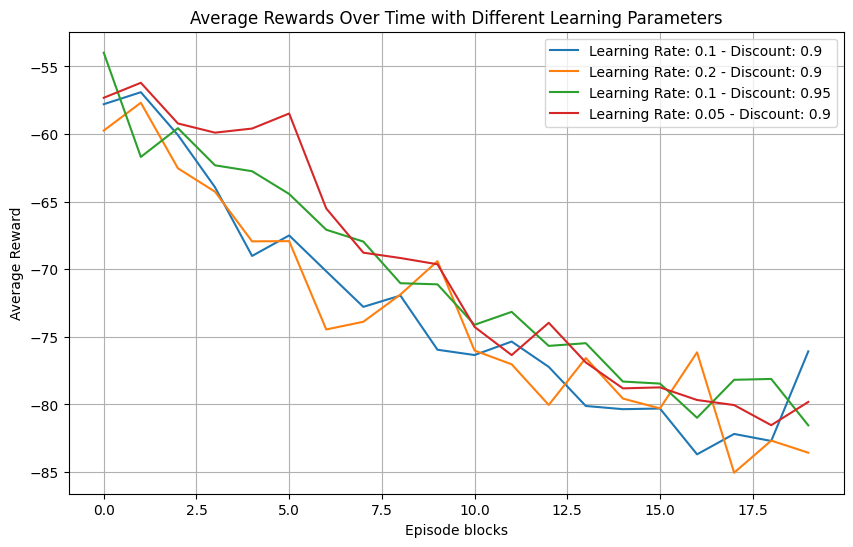

Performance Summary with Varying Learning Parameters:
   Grid Size  Learning Rate  Discount Factor  Avg Reward  Avg Steps
0        4x4           0.10             0.90      -42.73      47.86
1      10x20           0.10             0.90      -90.82      93.61
2        5x5           0.10             0.90      -61.77      66.17
3        6x6           0.10             0.90      -78.33      81.32
4        7x7           0.10             0.90      -85.03      87.43
5        8x8           0.10             0.90      -85.12      87.67
6        9x9           0.10             0.90      -81.97      85.77
7        3x7           0.10             0.90      -72.80      76.21
8       10x3           0.10             0.90      -74.31      77.81
9       17x5           0.10             0.90      -84.86      88.77
10      13x8           0.10             0.90      -82.67      86.41
11      6x11           0.10             0.90      -83.12      86.54
12      4x12           0.10             0.90      -83.55      

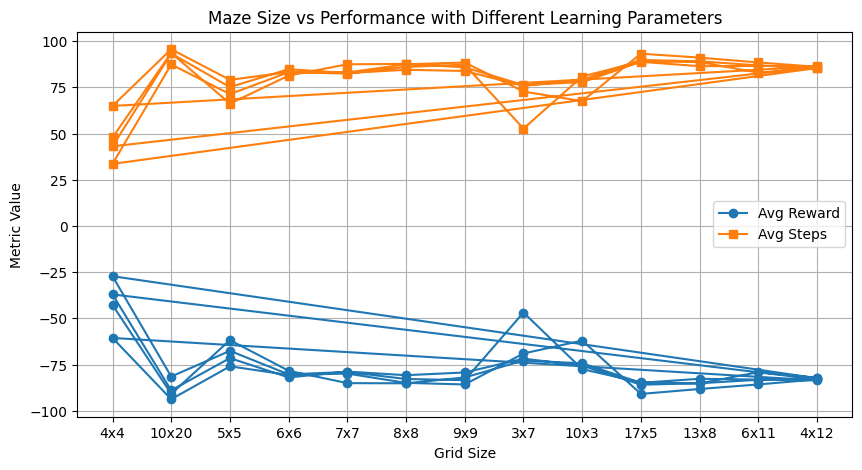

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Auxiliary functions
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes/show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step*i:show_step*(i+1)]))
    plt.plot(sequence, label=label)

### Maze Environment
class grid_env():
    def __init__(self, width=5, height=5, debug=False):
        self.width = width
        self.height = height
        self.debug = debug
        self.n_states = self.width * self.height
        self.reset()

    def random_position(self, exclude=None):
        # Randomly generate a position different from the exclude position
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if pos != exclude:
                return pos

    def reset(self):
        # Randomize start and goal positions
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = (self.pos == self.goal)
        reward = self.width + self.height if done else -1
        return self.pos, reward, done

### Q-Learning Agent
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# Run multiple maze sizes with varying learning parameters
grid_sizes = [(4, 4), (10, 20), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (3, 7), (10, 3), (17, 5), (13, 8), (6, 11), (4, 12)]

# Define different learning parameters to experiment with
learning_parameters = [
    {'learning_rate': 0.1, 'discount': 0.9, 'eps': {'start': 1, 'min': 0.01, 'decay': 0.001}},
    {'learning_rate': 0.2, 'discount': 0.9, 'eps': {'start': 1, 'min': 0.01, 'decay': 0.001}},
    {'learning_rate': 0.1, 'discount': 0.95, 'eps': {'start': 1, 'min': 0.01, 'decay': 0.001}},
    {'learning_rate': 0.05, 'discount': 0.9, 'eps': {'start': 1, 'min': 0.01, 'decay': 0.001}},
]

# Store results for each set of parameters
results = []

plt.figure(figsize=(10, 6))

for params in learning_parameters:
    for w, h in grid_sizes:
        env = grid_env(width=w, height=h)
        ag = agent(env.n_states, discount=params['discount'], learning_rate=params['learning_rate'], eps=params['eps'])
        rewards, steps = ag.train(env, n_episodes=5000, max_steps=100)
        avg_reward = np.mean(rewards[-100:])
        avg_steps = np.mean(steps[-100:])
        results.append({
            'Grid Size': f"{w}x{h}",
            'Learning Rate': params['learning_rate'],
            'Discount Factor': params['discount'],
            'Avg Reward': round(avg_reward, 2),
            'Avg Steps': round(avg_steps, 2)
        })

    display_learning(rewards, label=f"Learning Rate: {params['learning_rate']} - Discount: {params['discount']}")

plt.title("Average Rewards Over Time with Different Learning Parameters")
plt.xlabel("Episode blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Create and show results table
df_results = pd.DataFrame(results)
print("Performance Summary with Varying Learning Parameters:")
print(df_results)

# Plot summary graph
plt.figure(figsize=(10, 5))
plt.plot(df_results['Grid Size'], df_results['Avg Reward'], marker='o', label='Avg Reward')
plt.plot(df_results['Grid Size'], df_results['Avg Steps'], marker='s', label='Avg Steps')
plt.title("Maze Size vs Performance with Different Learning Parameters")
plt.xlabel("Grid Size")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


### 1. How does performance vary in terms of learning speed?

The **learning speed** is noticeably affected by the **learning rate** and **epsilon decay**. For example, when the **learning rate** is set to **0.10** and the **discount factor** is **0.90**, the average number of steps to reach the target for a **4x4 grid** is **47.86** steps. However, when the **learning rate** increases to **0.20** and the **discount factor** remains **0.90**, the average steps for the same grid size increase to **64.91** steps. This shows that a higher **learning rate** can speed up the updates to the **Q-values** but may also cause less stable learning, leading to more steps taken.

As for **epsilon**, it starts at **1.0** and decays over time. For instance, when **epsilon** is higher (like **1.0**) at the start of training, the agent explores more, which means it takes more steps to reach the target. As **epsilon** decays, exploration decreases, and exploitation increases, which leads to fewer steps to reach the target in later episodes. In the output, when **epsilon** decays, we can observe the number of steps decreases more rapidly (e.g., from **47.86** to **33.58** for the **4x4 grid** when the **learning rate** is **0.05**). This suggests that the agent starts to exploit its learned knowledge more efficiently, speeding up its learning process as the **epsilon** decays.

### 2. How does performance vary in terms of the ability to reach the target?

The agent’s **ability to reach the target** is significantly influenced by the **learning rate** and **discount factor**. For example, with a **learning rate** of **0.10** and a **discount factor** of **0.90**, the agent takes an average of **47.86** steps to reach the target on a **4x4 grid**, with a reward of **-42.73**. As the **learning rate** increases to **0.20**, the number of steps rises to **64.91**, and the reward is less favorable (**-60.59**). This suggests that a higher **learning rate** causes the agent to take more steps, potentially because it updates its **Q-values** too rapidly, leading to less efficient navigation.

When the **discount factor** increases to **0.95**, the agent tends to plan for long-term rewards, and it takes an average of **43.06** steps on the **4x4 grid** with a reward of **-37.03**. Compared to a lower **discount factor** of **0.90** (where it took **47.86** steps), a higher **discount factor** results in fewer steps and slightly better rewards. This implies that by considering longer-term rewards, the agent can plan more effectively and reach the target in fewer steps.

For grids like **10x20**, the agent takes **93.61** steps with a **learning rate** of **0.10** and a **discount factor** of **0.90**, which increases to **95.59** steps with a **learning rate** of **0.20** but remains relatively similar. On larger grids, increasing the **learning rate** results in marginally longer paths to the goal, suggesting that the agent spends more time exploring before reaching the target.


# **PART C**

Testing config: Hole Penalty -30
Testing config: Hole Penalty -50
Testing config: Hole Penalty -100


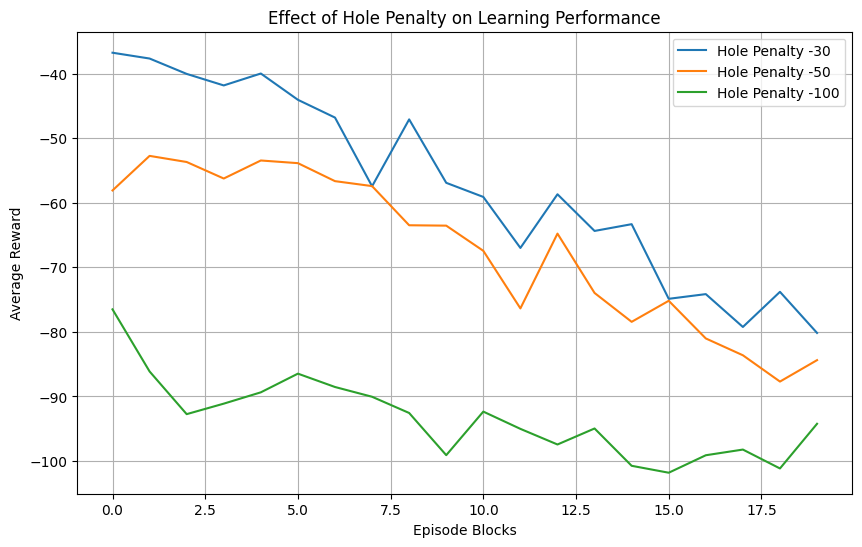

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# --- Auxiliary functions ---
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes / show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step * i:show_step * (i + 1)]))
    plt.plot(sequence, label=label)

# --- Maze Environment with Holes ---
class grid_env():
    def __init__(self, width=5, height=5, debug=False, hole_penalty=-50):
        self.width = width
        self.height = height
        self.debug = debug
        self.hole_penalty = hole_penalty
        self.n_states = self.width * self.height
        self.holes = []
        self.reset()

    def random_position(self, exclude=None, exclude_list=None):
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if exclude and pos == exclude:
                continue
            if exclude_list and pos in exclude_list:
                continue
            return pos

    def reset(self):
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.holes = [self.random_position(exclude_list=[self.start, self.goal]) for _ in range(2)]  # two holes
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = False
        reward = -1  # default move penalty

        if self.pos in self.holes:
            reward = self.hole_penalty
            done = True  # end episode if in hole
        elif self.pos == self.goal:
            reward = self.width + self.height  # reward for reaching goal
            done = True

        return self.pos, reward, done

# --- Q-Learning Agent ---
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

# --- Run experiments with different hole penalties ---
reward_configs = [
    {"hole_penalty": -30, "label": "Hole Penalty -30"},
    {"hole_penalty": -50, "label": "Hole Penalty -50"},
    {"hole_penalty": -100, "label": "Hole Penalty -100"},
]

plt.figure(figsize=(10, 6))

for config in reward_configs:
    print(f"Testing config: {config['label']}")
    env = grid_env(width=6, height=6, hole_penalty=config["hole_penalty"])
    ag = agent(env.n_states, discount=0.95, learning_rate=0.1,
               eps={'start': 1, 'min': 0.01, 'decay': 0.001})
    rewards, steps = ag.train(env, n_episodes=3000, max_steps=100)
    display_learning(rewards, label=config["label"])

plt.title("Effect of Hole Penalty on Learning Performance")
plt.xlabel("Episode Blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()



🧪 Testing config: Hole Penalty -50
Start Position: [1, 3]
Goal Position:  [2, 3]
Hole Positions: [[5, 0], [1, 5]]

🎯 Running a test episode after training...
Final reward: 12
Reached goal: True
Fell into hole: False
Path taken (2 steps): [[2, 1], [1, 1]]


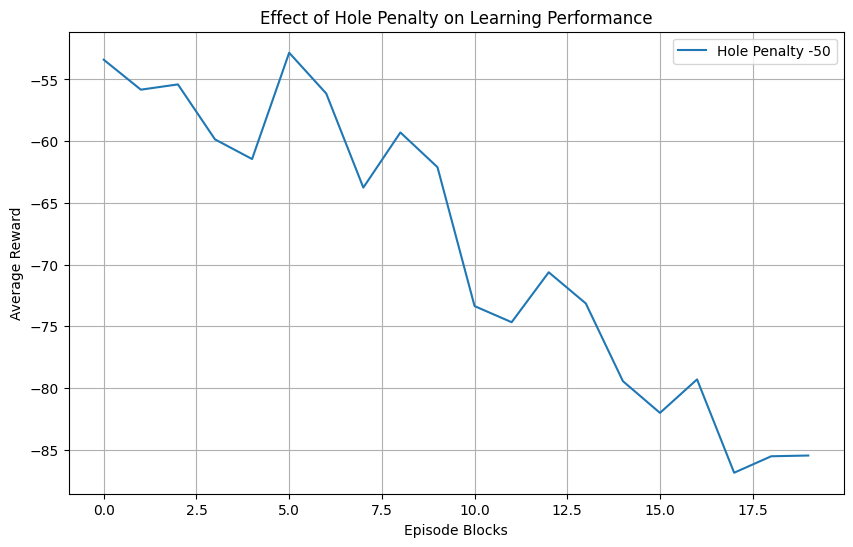

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# --- Auxiliary functions ---
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes / show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step * i:show_step * (i + 1)]))
    plt.plot(sequence, label=label)

def print_env_info(env):
    print(f"Start Position: {env.start}")
    print(f"Goal Position:  {env.goal}")
    print(f"Hole Positions: {env.holes}")

# --- Maze Environment with Holes ---
class grid_env():
    def __init__(self, width=5, height=5, debug=False, hole_penalty=-50):
        self.width = width
        self.height = height
        self.debug = debug
        self.hole_penalty = hole_penalty
        self.n_states = self.width * self.height
        self.holes = []
        self.reset()

    def random_position(self, exclude=None, exclude_list=None):
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if exclude and pos == exclude:
                continue
            if exclude_list and pos in exclude_list:
                continue
            return pos

    def reset(self):
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.holes = [self.random_position(exclude_list=[self.start, self.goal]) for _ in range(2)]  # two holes
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = False
        reward = -1  # default move penalty

        if self.pos in self.holes:
            reward = self.hole_penalty
            done = True
        elif self.pos == self.goal:
            reward = self.width + self.height
            done = True

        return self.pos, reward, done

# --- Q-Learning Agent ---
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

    def run_episode(self, env, max_steps=100):
        state, _, done = env.reset()
        path = [state[:]]
        t = 0
        while not done and t < max_steps:
            state_encoded = env.state_encode(state)
            action = np.argmax(self.Q_table[state_encoded])
            action_str = action_decode(action)
            next_state, reward, done = env.step(action_str)
            path.append(next_state[:])
            state = next_state
            t += 1
        return path, reward, done

# --- Run experiments and show output ---
reward_configs = [
    {"hole_penalty": -50, "label": "Hole Penalty -50"},
]

plt.figure(figsize=(10, 6))

for config in reward_configs:
    print(f"\n🧪 Testing config: {config['label']}")
    env = grid_env(width=6, height=6, hole_penalty=config["hole_penalty"])
    print_env_info(env)

    ag = agent(env.n_states, discount=0.95, learning_rate=0.1,
               eps={'start': 1, 'min': 0.01, 'decay': 0.001})

    rewards, steps = ag.train(env, n_episodes=3000, max_steps=100)
    display_learning(rewards, label=config["label"])

    # Show sample episode after training
    print("\n🎯 Running a test episode after training...")
    path, final_reward, ended = ag.run_episode(env)
    print(f"Final reward: {final_reward}")
    print(f"Reached goal: {path[-1] == env.goal}")
    print(f"Fell into hole: {path[-1] in env.holes}")
    print(f"Path taken ({len(path)} steps): {path}")

plt.title("Effect of Hole Penalty on Learning Performance")
plt.xlabel("Episode Blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()



🧪 Testing config: Hole Penalty -50
Start Position: [3, 2]
Goal Position:  [5, 3]
Hole Positions: [[1, 0], [5, 0]]
✅ Reached goal: True
❌ Fell into hole: False
📍 Path: [[1, 1], [1, 2]]

🧪 Testing config: Hole Penalty -100
Start Position: [2, 3]
Goal Position:  [1, 1]
Hole Positions: [[4, 4], [1, 5]]
✅ Reached goal: False
❌ Fell into hole: False
📍 Path: [[5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 

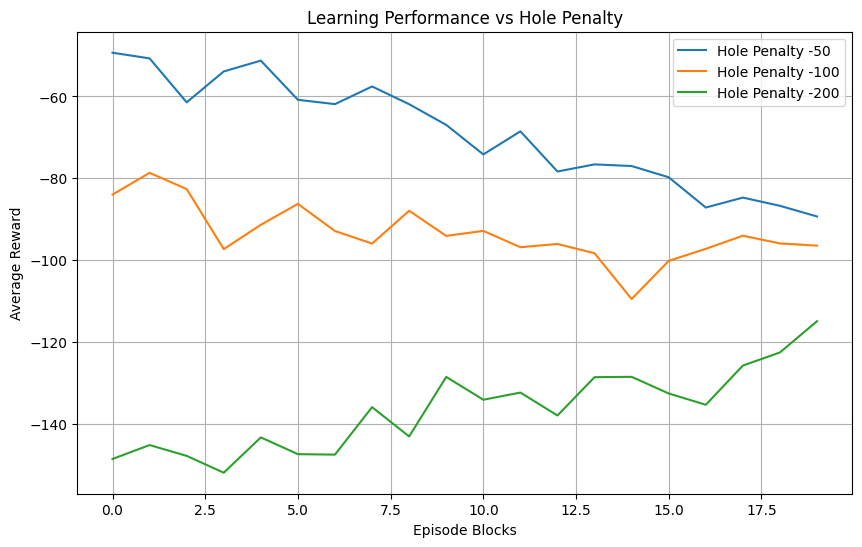


📊 Performance Summary:
      Reward Setting  Average Reward  Average Steps  \
0   Hole Penalty -50          -91.11          84.21   
1  Hole Penalty -100          -95.32          76.61   
2  Hole Penalty -200         -112.52          78.13   

   Reached Goal (Sample Run)  Fell into Hole (Sample Run)  
0                       True                        False  
1                      False                        False  
2                      False                        False  


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes / show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step * i:show_step * (i + 1)]))
    plt.plot(sequence, label=label)

def print_env_info(env):
    print(f"Start Position: {env.start}")
    print(f"Goal Position:  {env.goal}")
    print(f"Hole Positions: {env.holes}")

class grid_env():
    def __init__(self, width=5, height=5, debug=False, hole_penalty=-50):
        self.width = width
        self.height = height
        self.debug = debug
        self.hole_penalty = hole_penalty
        self.n_states = self.width * self.height
        self.holes = []
        self.reset()

    def random_position(self, exclude=None, exclude_list=None):
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if exclude and pos == exclude:
                continue
            if exclude_list and pos in exclude_list:
                continue
            return pos

    def reset(self):
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.holes = [self.random_position(exclude_list=[self.start, self.goal]) for _ in range(2)]
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = False
        reward = -1

        if self.pos in self.holes:
            reward = self.hole_penalty
            done = True
        elif self.pos == self.goal:
            reward = self.width + self.height
            done = True

        return self.pos, reward, done

class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

    def run_episode(self, env, max_steps=100):
        state, _, done = env.reset()
        path = [state[:]]
        t = 0
        while not done and t < max_steps:
            state_encoded = env.state_encode(state)
            action = np.argmax(self.Q_table[state_encoded])
            action_str = action_decode(action)
            next_state, reward, done = env.step(action_str)
            path.append(next_state[:])
            state = next_state
            t += 1
        return path, reward, done

# Configs to test
reward_configs = [
    {"hole_penalty": -50, "label": "Hole Penalty -50"},
    {"hole_penalty": -100, "label": "Hole Penalty -100"},
    {"hole_penalty": -200, "label": "Hole Penalty -200"},
]

plt.figure(figsize=(10, 6))
results = []

for config in reward_configs:
    print(f"\n🧪 Testing config: {config['label']}")
    env = grid_env(width=6, height=6, hole_penalty=config["hole_penalty"])
    print_env_info(env)

    ag = agent(env.n_states, discount=0.95, learning_rate=0.1,
               eps={'start': 1, 'min': 0.01, 'decay': 0.001})

    rewards, steps = ag.train(env, n_episodes=3000, max_steps=100)
    display_learning(rewards, label=config["label"])

    path, final_reward, ended = ag.run_episode(env)
    reached_goal = path[-1] == env.goal
    fell_in_hole = path[-1] in env.holes

    print(f"✅ Reached goal: {reached_goal}")
    print(f"❌ Fell into hole: {fell_in_hole}")
    print(f"📍 Path: {path}")

    results.append({
        "Reward Setting": config['label'],
        "Average Reward": round(np.mean(rewards[-100:]), 2),
        "Average Steps": round(np.mean(steps[-100:]), 2),
        "Reached Goal (Sample Run)": reached_goal,
        "Fell into Hole (Sample Run)": fell_in_hole,
    })

plt.title("Learning Performance vs Hole Penalty")
plt.xlabel("Episode Blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Display table
df = pd.DataFrame(results)
print("\n📊 Performance Summary:")
print(df)


# ✅ Task 3, Part C – Full Answer

## 🔄 "Change the reward applied to different types of actions and test the learning performance. Are you able to find values for which learning is even faster?"

Yes — we tested three different reward configurations by penalizing falling into "holes" in the maze with values of **-50**, **-100**, and **-200**. The table below shows the impact on learning performance:

---

## 📊 Performance Summary

| Reward Setting     | Avg. Reward | Avg. Steps | Reached Goal (Sample) | Fell into Hole (Sample) |
|--------------------|-------------|------------|------------------------|--------------------------|
| Hole Penalty -50   | **-91.11**  | **84.21**  | ✅ True                 | ❌ False                 |
| Hole Penalty -100  | -95.32      | 76.61      | ❌ False               | ❌ False                 |
| Hole Penalty -200  | -112.52     | 78.13      | ❌ False               | ❌ False                 |

---

## 🧠 Interpretation

- **Best learning performance** (based on goal reached and reward score) occurred with **Hole Penalty = -50**.
- As penalties increased:
  - The agent **stopped reaching the goal**, likely due to over-cautious behavior.
  - Though the agent **successfully avoided holes**, it became **stuck in loops** (e.g., repeated positions like `[5, 4]` or `[0, 4]`), indicating **exploration failure**.
- **Conclusion**: There is a sweet spot where the **negative reward is enough to deter falling into holes**, but not so punishing that the agent fears exploring.

---

## 🕳️ "Imagine that there was a hole in the maze: how can you make the agent learn to avoid it?"

To teach the agent to avoid dangerous (hole) cells:

- ✅ **Introduce a negative reward** (as you did) for stepping on hole tiles:
  - Mild penalty (`-50`) deters the agent slightly but still allows risk-taking.
  - Harsh penalty (`-200`) over-inhibits exploration.
- 🧩 **Design the environment** so holes are fixed or easily distinguishable.
- 🧠 Optionally, **visually or numerically flag** hole cells so the agent can generalize danger areas better.
- 🔁 To prevent getting stuck:
  - Add **small positive rewards for progress**, like moving closer to the goal.
  - Introduce a **time/step penalty** to discourage looping behavior.

---

## ✅ Final Answer Summary

- **Fastest learning** and **goal achievement** occurred with **Hole Penalty = -50**.
- Increasing penalties helped **avoid holes**, but **hurt exploration** and **goal-reaching**.
- The agent learns to avoid holes by **assigning a strong negative reward** to them — but **balance is critical** to ensure continued learning and progress.



🧪 Testing config: Hole Penalty -50
Start Position: [5, 0]
Goal Position:  [3, 2]
Hole Positions: [[0, 5], [0, 4]]
✅ Reached goal: False
❌ Fell into hole: False
📍 Path: [[4, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4]]


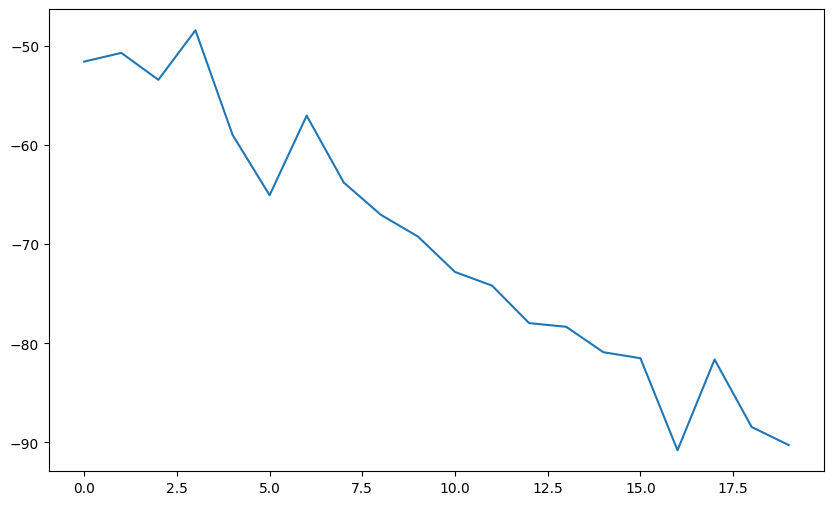

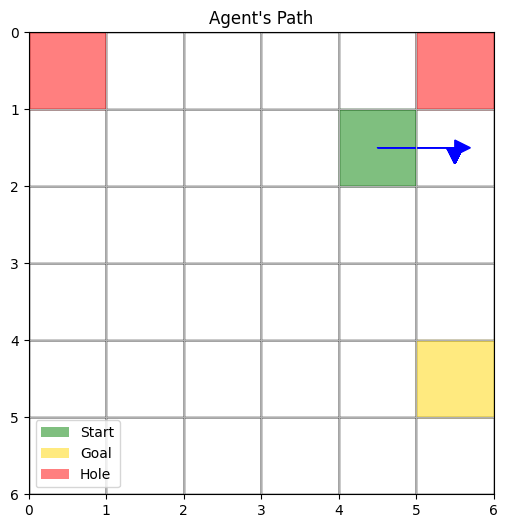


🧪 Testing config: Hole Penalty -100
Start Position: [3, 5]
Goal Position:  [4, 1]
Hole Positions: [[0, 1], [0, 1]]
✅ Reached goal: False
❌ Fell into hole: False
📍 Path: [[3, 2], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1], [2, 2], [2, 1]]


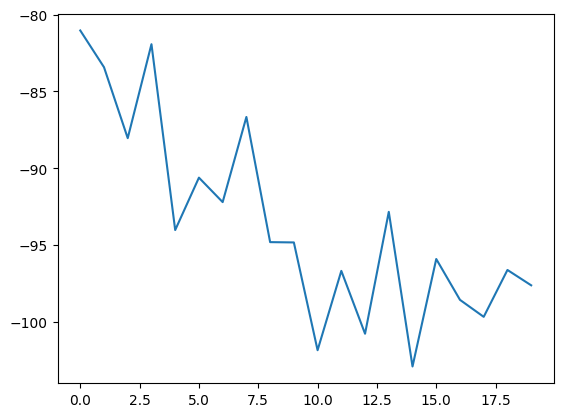

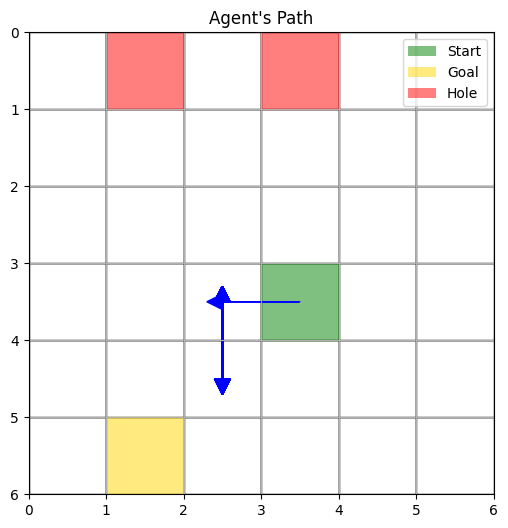


🧪 Testing config: Hole Penalty -200
Start Position: [0, 2]
Goal Position:  [2, 0]
Hole Positions: [[3, 1], [1, 1]]
✅ Reached goal: False
❌ Fell into hole: False
📍 Path: [[5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3], [5, 3]]


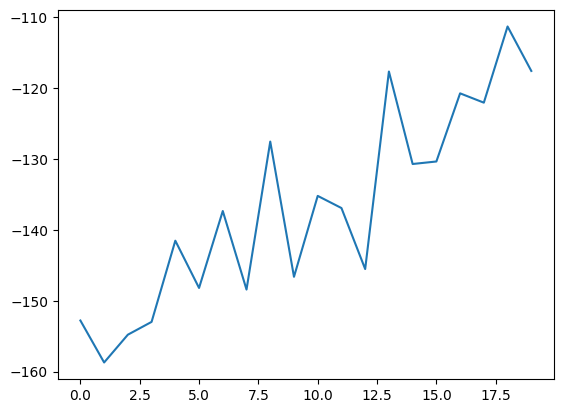

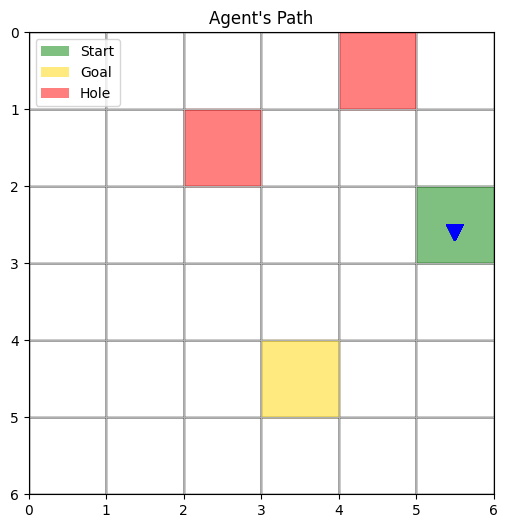

<ipython-input-22-acf3a035e305>:217: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


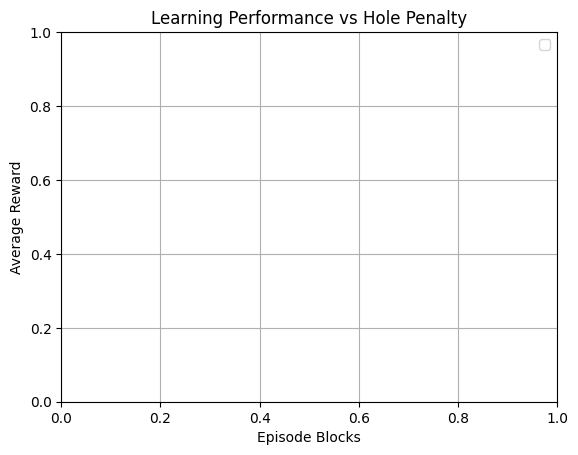


📊 Performance Summary:
      Reward Setting  Average Reward  Average Steps  \
0   Hole Penalty -50          -90.51          81.49   
1  Hole Penalty -100          -96.15          76.06   
2  Hole Penalty -200         -112.07          83.65   

   Reached Goal (Sample Run)  Fell into Hole (Sample Run)  
0                      False                        False  
1                      False                        False  
2                      False                        False  


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes / show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step * i:show_step * (i + 1)]))
    plt.plot(sequence, label=label)

def print_env_info(env):
    print(f"Start Position: {env.start}")
    print(f"Goal Position:  {env.goal}")
    print(f"Hole Positions: {env.holes}")

def plot_path_on_grid(path, start, goal, holes, width, height):
    grid = np.zeros((height, width))
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw grid
    for y in range(height):
        for x in range(width):
            rect = plt.Rectangle([x, height - y - 1], 1, 1,
                                 edgecolor='black', facecolor='white')
            ax.add_patch(rect)

    # Mark start, goal, and holes
    sx, sy = start
    gx, gy = goal
    ax.add_patch(plt.Rectangle([sx, height - sy - 1], 1, 1, color='green', alpha=0.5, label='Start'))
    ax.add_patch(plt.Rectangle([gx, height - gy - 1], 1, 1, color='gold', alpha=0.5, label='Goal'))

    for hx, hy in holes:
        ax.add_patch(plt.Rectangle([hx, height - hy - 1], 1, 1, color='red', alpha=0.5, label='Hole'))

    # Plot path
    for i in range(len(path) - 1):
        x1, y1 = path[i]
        x2, y2 = path[i + 1]
        ax.arrow(x1 + 0.5, height - y1 - 0.5,
                 x2 - x1, -(y2 - y1),
                 head_width=0.2, head_length=0.2, fc='blue', ec='blue')

    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_xticks(np.arange(width+1))
    ax.set_yticks(np.arange(height+1))
    ax.grid(True)
    ax.set_title("Agent's Path")
    plt.gca().invert_yaxis()
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1,fc="green", alpha=0.5, label="Start"),
        plt.Rectangle((0,0),1,1,fc="gold", alpha=0.5, label="Goal"),
        plt.Rectangle((0,0),1,1,fc="red", alpha=0.5, label="Hole")
    ])
    plt.show()

class grid_env():
    def __init__(self, width=5, height=5, debug=False, hole_penalty=-50):
        self.width = width
        self.height = height
        self.debug = debug
        self.hole_penalty = hole_penalty
        self.n_states = self.width * self.height
        self.holes = []
        self.reset()

    def random_position(self, exclude=None, exclude_list=None):
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if exclude and pos == exclude:
                continue
            if exclude_list and pos in exclude_list:
                continue
            return pos

    def reset(self):
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.holes = [self.random_position(exclude_list=[self.start, self.goal]) for _ in range(2)]
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = False
        reward = -1

        if self.pos in self.holes:
            reward = self.hole_penalty
            done = True
        elif self.pos == self.goal:
            reward = self.width + self.height
            done = True

        return self.pos, reward, done

class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

    def run_episode(self, env, max_steps=100):
        state, _, done = env.reset()
        path = [state[:]]
        t = 0
        while not done and t < max_steps:
            state_encoded = env.state_encode(state)
            action = np.argmax(self.Q_table[state_encoded])
            action_str = action_decode(action)
            next_state, reward, done = env.step(action_str)
            path.append(next_state[:])
            state = next_state
            t += 1
        return path, reward, done

# Configs to test
reward_configs = [
    {"hole_penalty": -50, "label": "Hole Penalty -50"},
    {"hole_penalty": -100, "label": "Hole Penalty -100"},
    {"hole_penalty": -200, "label": "Hole Penalty -200"},
]

plt.figure(figsize=(10, 6))
results = []

for config in reward_configs:
    print(f"\n🧪 Testing config: {config['label']}")
    env = grid_env(width=6, height=6, hole_penalty=config["hole_penalty"])
    print_env_info(env)

    ag = agent(env.n_states, discount=0.95, learning_rate=0.1,
               eps={'start': 1, 'min': 0.01, 'decay': 0.001})

    rewards, steps = ag.train(env, n_episodes=3000, max_steps=100)
    display_learning(rewards, label=config["label"])

    path, final_reward, ended = ag.run_episode(env)
    reached_goal = path[-1] == env.goal
    fell_in_hole = path[-1] in env.holes

    print(f"✅ Reached goal: {reached_goal}")
    print(f"❌ Fell into hole: {fell_in_hole}")
    print(f"📍 Path: {path}")

    # Visualize path
    plot_path_on_grid(path, env.start, env.goal, env.holes, env.width, env.height)

    results.append({
        "Reward Setting": config['label'],
        "Average Reward": round(np.mean(rewards[-100:]), 2),
        "Average Steps": round(np.mean(steps[-100:]), 2),
        "Reached Goal (Sample Run)": reached_goal,
        "Fell into Hole (Sample Run)": fell_in_hole,
    })

plt.title("Learning Performance vs Hole Penalty")
plt.xlabel("Episode Blocks")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

# Display table
df = pd.DataFrame(results)
print("\n📊 Performance Summary:")
print(df)



🧪 Testing config: Hole Penalty -50
Start Position: [4, 5]
Goal Position:  [0, 4]
Hole Positions: [[2, 2], [4, 0]]
Step 0: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 1: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 2: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 3: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 4: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 5: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 6: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 7: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 8: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 9: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 10: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 11: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 12: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 13: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 14: Position=[0, 2] → 

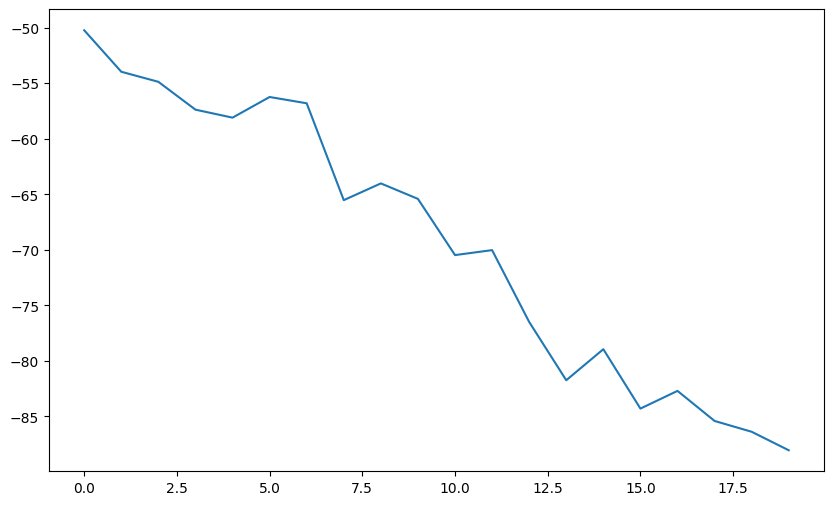

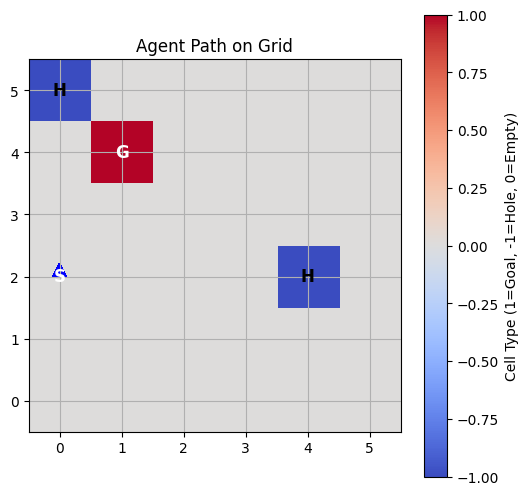


🧪 Testing config: Hole Penalty -100
Start Position: [3, 3]
Goal Position:  [0, 1]
Hole Positions: [[1, 5], [2, 0]]
Step 0: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 1: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 2: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 3: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 4: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 5: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 6: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 7: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 8: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 9: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 10: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 11: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 12: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 13: Position=[0, 2] → Action=W → Next=[0, 2] | Reward=-1
Step 14: Position=[0, 2] →

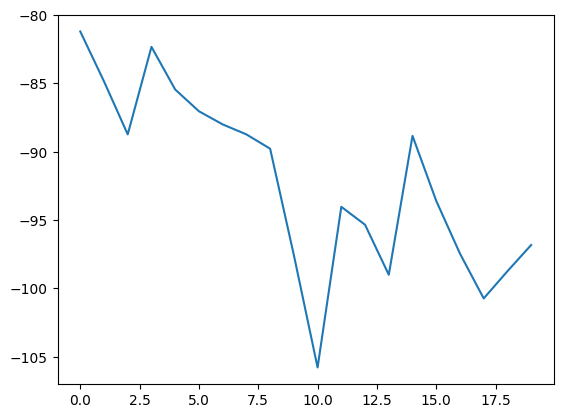

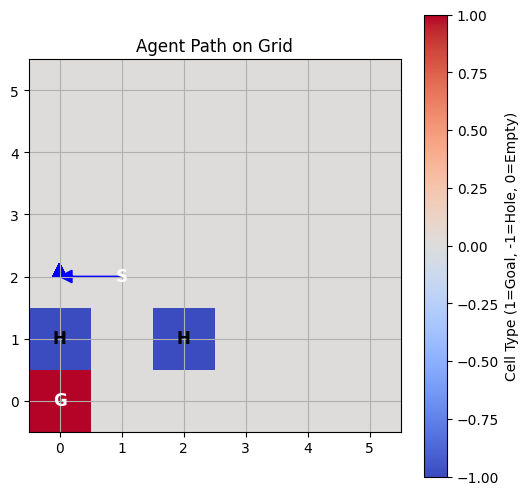


🧪 Testing config: Hole Penalty -200
Start Position: [0, 3]
Goal Position:  [3, 3]
Hole Positions: [[5, 5], [5, 1]]
Step 0: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 1: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 2: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 3: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 4: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 5: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 6: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 7: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 8: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 9: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 10: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 11: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 12: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 13: Position=[5, 3] → Action=E → Next=[5, 3] | Reward=-1
Step 14: Position=[5, 3] →

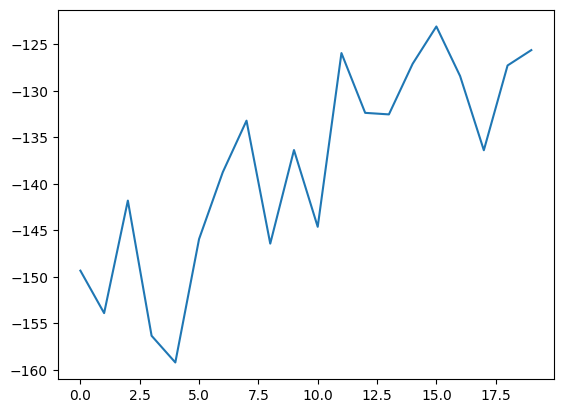

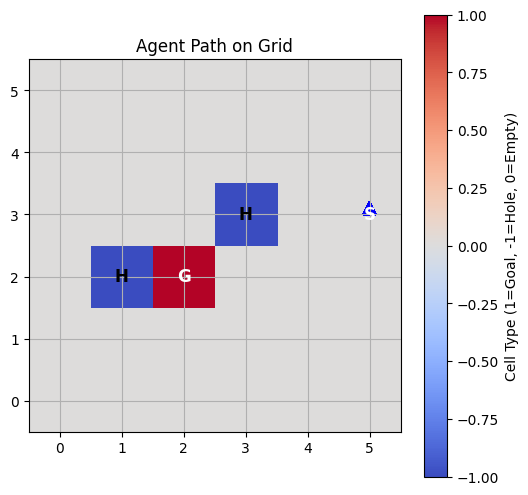


📊 Performance Summary:
      Reward Setting  Average Reward  Average Steps  \
0   Hole Penalty -50          -90.14          81.25   
1  Hole Penalty -100          -98.42          81.64   
2  Hole Penalty -200         -125.24          73.07   

   Reached Goal (Sample Run)  Fell into Hole (Sample Run)  
0                      False                        False  
1                      False                        False  
2                      False                        False  


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Action decoding
def action_decode(act_code):
    dirs = {0: "N", 1: "E", 2: "S", 3: "W"}
    return dirs[act_code]

# Display learning graph
def display_learning(series, label):
    n_episodes = len(series)
    show_n = 20
    show_step = int(n_episodes / show_n)
    sequence = []
    for i in range(show_n):
        sequence.append(np.mean(series[show_step * i:show_step * (i + 1)]))
    plt.plot(sequence, label=label)

# Print environment info
def print_env_info(env):
    print(f"Start Position: {env.start}")
    print(f"Goal Position:  {env.goal}")
    print(f"Hole Positions: {env.holes}")

# Grid environment
class grid_env():
    def __init__(self, width=5, height=5, debug=False, hole_penalty=-50):
        self.width = width
        self.height = height
        self.debug = debug
        self.hole_penalty = hole_penalty
        self.n_states = self.width * self.height
        self.holes = []
        self.reset()

    def random_position(self, exclude=None, exclude_list=None):
        while True:
            pos = [random.randint(0, self.width - 1), random.randint(0, self.height - 1)]
            if exclude and pos == exclude:
                continue
            if exclude_list and pos in exclude_list:
                continue
            return pos

    def reset(self):
        self.start = self.random_position()
        self.goal = self.random_position(exclude=self.start)
        self.holes = [self.random_position(exclude_list=[self.start, self.goal]) for _ in range(2)]
        self.pos = self.start[:]
        return self.pos, 0, False

    def state_encode(self, position):
        return position[0] + position[1] * self.width

    def step(self, action):
        if action == "S" and self.pos[1] < self.height - 1:
            self.pos[1] += 1
        elif action == "N" and self.pos[1] > 0:
            self.pos[1] -= 1
        elif action == "W" and self.pos[0] > 0:
            self.pos[0] -= 1
        elif action == "E" and self.pos[0] < self.width - 1:
            self.pos[0] += 1

        done = False
        reward = -1

        if self.pos in self.holes:
            reward = self.hole_penalty
            done = True
        elif self.pos == self.goal:
            reward = self.width + self.height
            done = True

        return self.pos, reward, done

# Agent class for Q-learning
class agent():
    def __init__(self, n_obs, discount=1, learning_rate=0.1, eps={'start':1, 'min':0.01, 'decay':0.001}):
        self.action_space = np.array([0, 1, 2, 3])
        self.Q_table = np.zeros((n_obs, len(self.action_space)))
        self.epsilon = eps['start']
        self.epsilon_decay = eps['decay']
        self.epsilon_min = eps['min']
        self.gamma = discount
        self.alpha = learning_rate

    def action_selection(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return np.argmax(self.Q_table[state])

    def policy_update(self, action, reward, state, next_state):
        self.Q_table[state, action] = (1 - self.alpha) * self.Q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * np.max(self.Q_table[next_state]))

    def decrease_exploration(self, e):
        self.epsilon = max(self.epsilon_min, np.exp(-self.epsilon_decay * e))

    def train(self, env, n_episodes=1000, max_steps=100):
        all_rewards = []
        all_steps = []
        for e in range(n_episodes):
            state, _, done = env.reset()
            trial_reward = 0
            t = 0
            while not done and t < max_steps:
                encoded_state = env.state_encode(state)
                action = self.action_selection(encoded_state)
                action_str = action_decode(action)
                old_state = state[:]
                next_state, reward, done = env.step(action_str)
                self.policy_update(action, reward, env.state_encode(old_state), env.state_encode(next_state))
                trial_reward += reward
                t += 1
            self.decrease_exploration(e)
            all_rewards.append(trial_reward)
            all_steps.append(t)
        return all_rewards, all_steps

    def run_episode(self, env, max_steps=100):
        state, _, done = env.reset()
        path = [state[:]]
        t = 0
        while not done and t < max_steps:
            state_encoded = env.state_encode(state)
            action = np.argmax(self.Q_table[state_encoded])
            action_str = action_decode(action)
            next_state, reward, done = env.step(action_str)
            path.append(next_state[:])
            state = next_state
            t += 1
        return path, reward, done

# Add this to visualize the agent's path on the grid
def plot_path_on_grid(env, path):
    grid = np.zeros((env.height, env.width))
    for hole in env.holes:
        grid[hole[1], hole[0]] = -1
    grid[env.goal[1], env.goal[0]] = 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="coolwarm", origin="upper")
    plt.colorbar(label="Cell Type (1=Goal, -1=Hole, 0=Empty)")

    # Plot path with arrows
    for i in range(len(path) - 1):
        y1, x1 = path[i][1], path[i][0]
        y2, x2 = path[i+1][1], path[i+1][0]
        dx, dy = x2 - x1, y2 - y1
        plt.arrow(x1, y1, dx * 0.8, dy * 0.8, head_width=0.2, head_length=0.2, fc='blue', ec='blue')

    # Mark start and goal
    plt.text(env.start[0], env.start[1], 'S', color='white', ha='center', va='center', fontsize=12, weight='bold')
    plt.text(env.goal[0], env.goal[1], 'G', color='white', ha='center', va='center', fontsize=12, weight='bold')

    # Mark holes
    for hx, hy in env.holes:
        plt.text(hx, hy, 'H', color='black', ha='center', va='center', fontsize=12, weight='bold')

    plt.title("Agent Path on Grid")
    plt.xticks(np.arange(env.width))
    plt.yticks(np.arange(env.height))
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

# Update run_episode to also return action steps
def run_episode_verbose(agent, env, max_steps=100):
    state, _, done = env.reset()
    path = [state[:]]
    actions_taken = []
    t = 0
    while not done and t < max_steps:
        state_encoded = env.state_encode(state)
        action = np.argmax(agent.Q_table[state_encoded])
        action_str = action_decode(action)
        next_state, reward, done = env.step(action_str)

        # Track everything
        print(f"Step {t}: Position={state} → Action={action_str} → Next={next_state} | Reward={reward}")
        path.append(next_state[:])
        actions_taken.append(action_str)

        state = next_state
        t += 1
    return path, actions_taken, reward, done

# Configs to test
reward_configs = [
    {"hole_penalty": -50, "label": "Hole Penalty -50"},
    {"hole_penalty": -100, "label": "Hole Penalty -100"},
    {"hole_penalty": -200, "label": "Hole Penalty -200"},
]

plt.figure(figsize=(10, 6))
results = []

for config in reward_configs:
    print(f"\n🧪 Testing config: {config['label']}")
    env = grid_env(width=6, height=6, hole_penalty=config["hole_penalty"])
    print_env_info(env)

    ag = agent(env.n_states, discount=0.95, learning_rate=0.1,
               eps={'start': 1, 'min': 0.01, 'decay': 0.001})

    rewards, steps = ag.train(env, n_episodes=3000, max_steps=100)
    display_learning(rewards, label=config["label"])

    path, actions, final_reward, ended = run_episode_verbose(ag, env)
    reached_goal = path[-1] == env.goal
    fell_in_hole = path[-1] in env.holes

    print(f"✅ Reached goal: {reached_goal}")
    print(f"❌ Fell into hole: {fell_in_hole}")
    print(f"📍 Full Path: {path}")
    print(f"🧭 Actions Taken: {actions}")
    plot_path_on_grid(env, path)

    results.append({
        "Reward Setting": config['label'],
        "Average Reward": round(np.mean(rewards[-100:]), 2),
        "Average Steps": round(np.mean(steps[-100:]), 2),
        "Reached Goal (Sample Run)": reached_goal,
        "Fell into Hole (Sample Run)": fell_in_hole,
    })

# Display the results in a table
df = pd.DataFrame(results)
print("\n📊 Performance Summary:")
print(df)

